# Train and check the model predictions

In [1]:
area_casa = [30, 220, 100, 110, 90]
precio_casa = [200000, 400000, 220000, 250000, 180000]

In [2]:
import pandas as pd

df = pd.DataFrame({"area": area_casa, "precio": precio_casa})
df

,area,precio
0,30,200000
1,220,400000
2,100,220000
3,110,250000
4,90,180000


In [3]:
new_df = pd.DataFrame({'area': [120]})
new_df

,area
0,120


In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X=df[['area']], 
          y=df.precio)

model.predict(new_df)

array([261684.21052632])

In [5]:
model.predict(pd.DataFrame({'area': [130, 250, 50]}))

array([273368.42105263, 413578.94736842, 179894.73684211])

`y = m * x + n`

In [6]:
model.intercept_

121473.68421052633

In [7]:
model.coef_

array([1168.42105263])

In [8]:
model.intercept_ + model.coef_[0] * 130

273368.4210526316

In [13]:
model.predict(pd.DataFrame({'area': [300]}))

array([472000.])

In [14]:
model.intercept_ + model.coef_[0] * 300

471999.99999999994

In [16]:
model.coef_

array([1168.42105263])

In [17]:
model.coef_[0]

1168.4210526315787

In [18]:
# np.linspace(25, 230, 100)

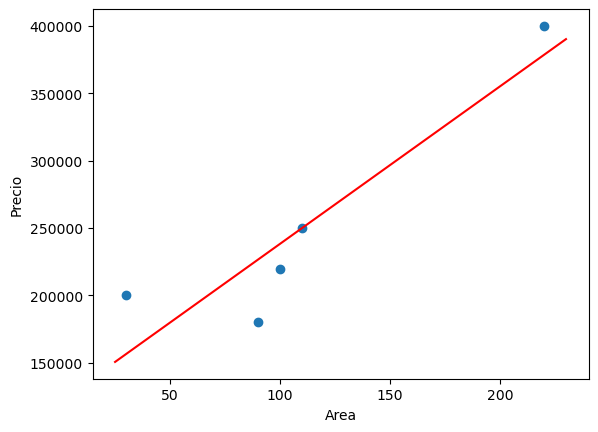

In [19]:
import matplotlib.pyplot as plt
import numpy as np

xticks = np.linspace(25, 230, 100)
yticks = model.intercept_ + model.coef_[0] * xticks
plt.plot(xticks, yticks, c='r')

plt.scatter(df.area, df.precio);
plt.xlabel('Area');
plt.ylabel('Precio');

# Save and load the model

In [20]:
import pickle
import os

with open('my_favourite_dict.bin', mode='wb') as file:
    pickle.dump({"a": 7, "w": 1242343.434}, file)

In [21]:
with open('model.bin', mode='wb') as file:
    pickle.dump(model, file)

In [23]:
os.listdir()

['.ipynb_checkpoints',
 '01_house_price_estimation_base.ipynb',
 'titanic.csv',
 'Untitled.ipynb',
 '00_intro_to_sklearn.ipynb',
 'ses_1',
 'my_favourite_dict.bin',
 'model.bin']

In [24]:
with open('my_favourite_dict.bin', mode='rb') as file:
    loaded_dict = pickle.load(file)
loaded_dict

{'a': 7, 'w': 1242343.434}

In [25]:
with open('model.bin', mode='rb') as file:
    loaded_model = pickle.load(file)
    
loaded_model

LinearRegression()

In [26]:
loaded_model.predict([[300]])

/home/infinitemonkeys/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([472000.])

In [27]:
model

LinearRegression()

# Estimate model error

In [28]:
df

,area,precio
0,30,200000
1,220,400000
2,100,220000
3,110,250000
4,90,180000


In [29]:
predictions = model.predict(df[['area']])
predictions

array([156526.31578947, 378526.31578947, 238315.78947368, 250000.        ,
       226631.57894737])

In [39]:
errors = df.precio.values - predictions
errors

array([ 43473.68421053,  21473.68421053, -18315.78947368,      0.        ,
       -46631.57894737])

In [40]:
np.sum(errors)

0.0

In [41]:
np.mean(errors)

0.0

Error absoluto medio

In [44]:
np.mean(np.abs(errors))

25978.947368421057

In [47]:
model.predict([[300]])

/home/infinitemonkeys/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([472000.])

valor estimado para 300 m2: 472.000 +- 27000 €

Error cuadrático medio

In [46]:
np.sqrt(np.mean(np.power(errors, 2)))

31180.2906708034